In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(768, 9)

In [4]:
#Finding the number of missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
countGlucose=(data['Glucose'] ==0).sum()
countGlucose

5

In [7]:
countBMI=(data['BMI'] == 0).sum()
countBMI

11

In [8]:
countInsulin=(data['Insulin'] ==0).sum()
countInsulin

374

In [9]:
countSkin=(data['SkinThickness'] ==0).sum()
countSkin

227

In [10]:
countBP=(data['BloodPressure'] ==0).sum()
countBP

35

<AxesSubplot: ylabel='Frequency'>

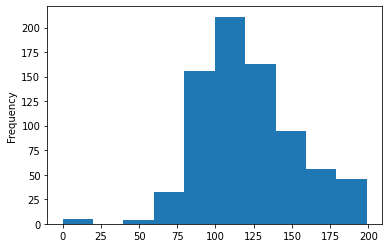

In [11]:
data['Glucose'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

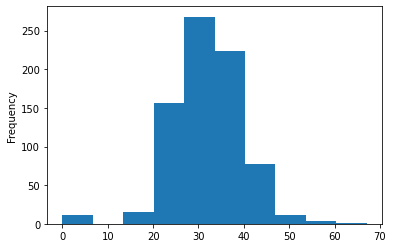

In [12]:
data['BMI'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

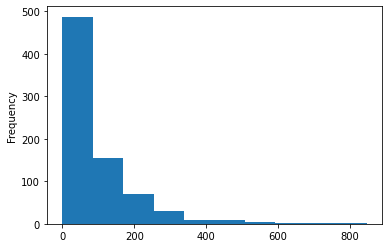

In [13]:
data['Insulin'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

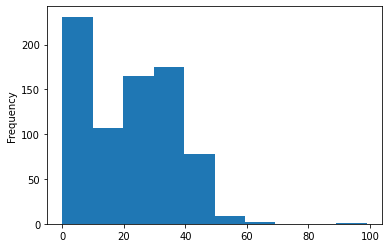

In [14]:
data['SkinThickness'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

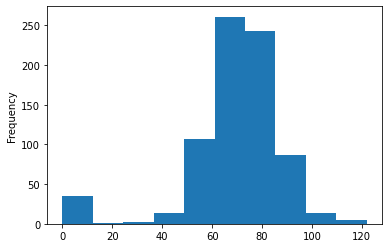

In [15]:
data['BloodPressure'].plot.hist()

In [16]:
data.drop(data[data.Glucose == 0].index, inplace=True)

In [17]:
data.drop(data[data.BloodPressure == 0].index, inplace=True)

In [18]:
data.drop(data[data.SkinThickness == 0].index, inplace=True)

In [19]:
data.drop(data[data.Insulin == 0].index, inplace=True)

In [20]:
data.drop(data[data.BMI == 0].index, inplace=True)

In [21]:
data = data.reset_index(drop=True)

In [22]:
data.shape

(392, 9)

In [23]:
data.to_excel('diabetes2.xlsx',index=False)

In [24]:
countInsulin=(data['Insulin'] ==0).sum()
countInsulin

0

<AxesSubplot: ylabel='Frequency'>

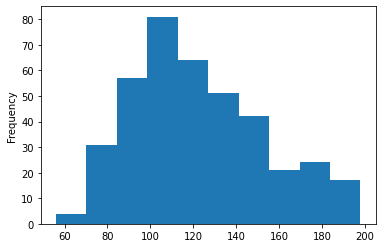

In [25]:
data['Glucose'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

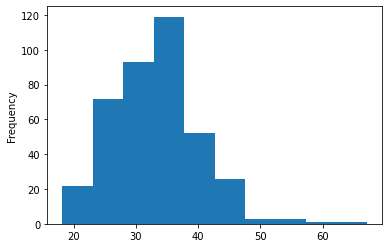

In [26]:
data['BMI'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

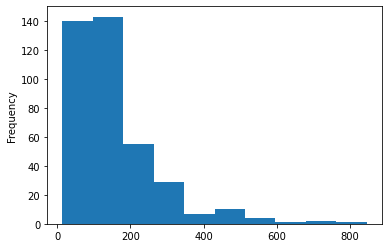

In [27]:
data['Insulin'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

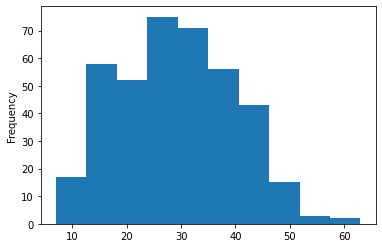

In [28]:
data['SkinThickness'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

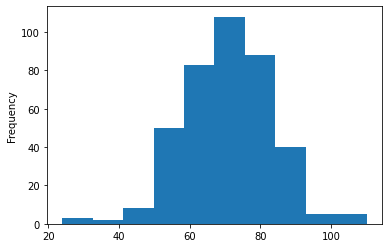

In [29]:
data['BloodPressure'].plot.hist()

<AxesSubplot: >

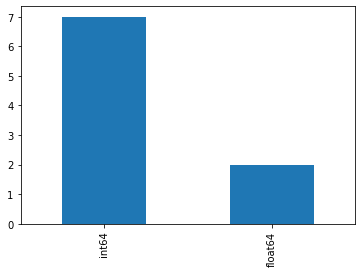

In [30]:
data.dtypes.value_counts().plot(kind='bar')

In [31]:
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [32]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot: >

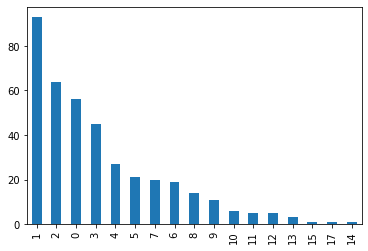

In [33]:
data['Pregnancies'].value_counts().plot(kind='bar')

In [34]:
data['Pregnancies'].value_counts()

1     93
2     64
0     56
3     45
4     27
5     21
7     20
6     19
8     14
9     11
10     6
11     5
12     5
13     3
15     1
17     1
14     1
Name: Pregnancies, dtype: int64

<AxesSubplot: >

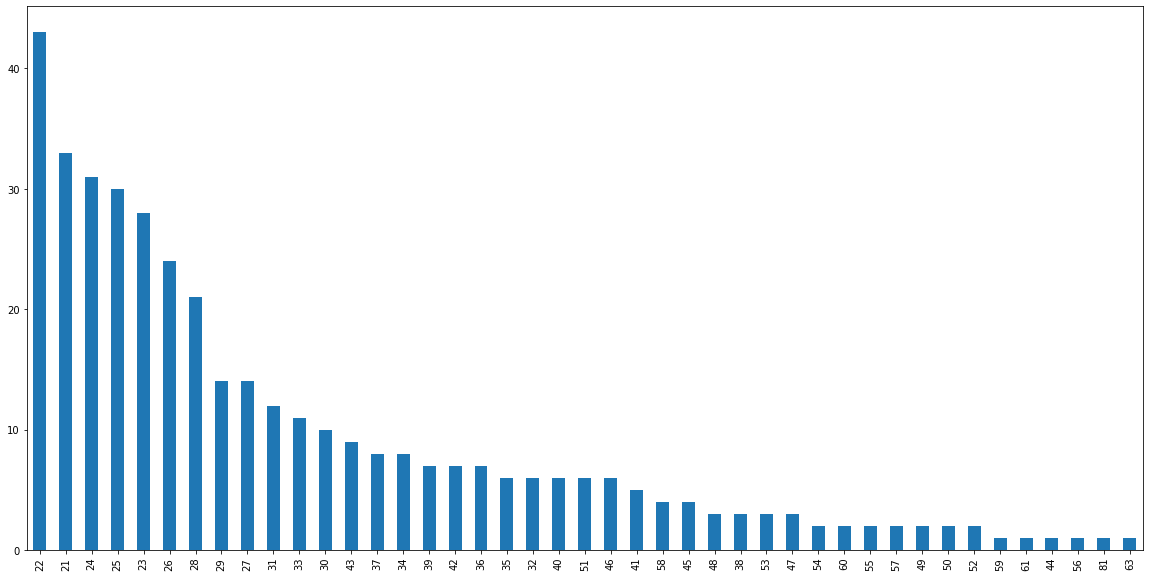

In [35]:
data['Age'].value_counts().plot(kind='bar',figsize=(20,10))

In [36]:
data['Age'].value_counts()

22    43
21    33
24    31
25    30
23    28
26    24
28    21
29    14
27    14
31    12
33    11
30    10
43     9
37     8
34     8
39     7
42     7
36     7
35     6
32     6
40     6
51     6
46     6
41     5
58     4
45     4
48     3
38     3
53     3
47     3
54     2
60     2
55     2
57     2
49     2
50     2
52     2
59     1
61     1
44     1
56     1
81     1
63     1
Name: Age, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9f3287850>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9f3287d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9f32875b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd9f32b4310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9f32b45b0>],
 'means': []}

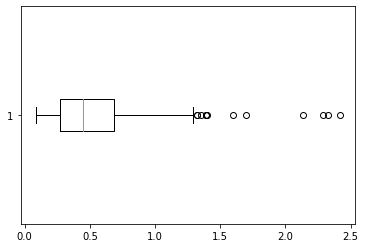

In [37]:
plt.boxplot(data['DiabetesPedigreeFunction'],vert=False)

<AxesSubplot: ylabel='Frequency'>

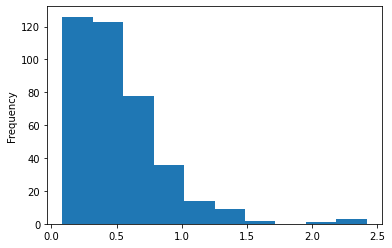

In [38]:
data['DiabetesPedigreeFunction'].plot.hist()

<AxesSubplot: >

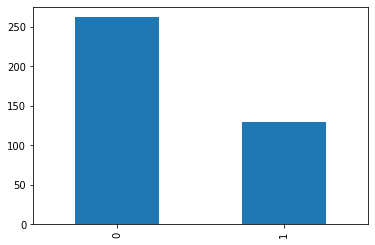

In [39]:
data['Outcome'].value_counts().plot(kind='bar')

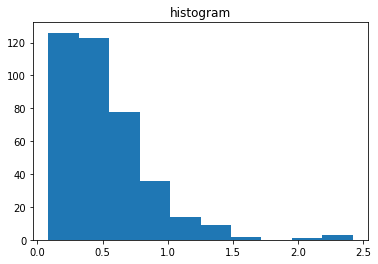

In [40]:
import numpy as np
#n, bins = np.histogram(data['DiabetesPedigreeFunction'], bins=10)
plt.hist(data['DiabetesPedigreeFunction'], bins=10)
plt.title("histogram") 
plt.show()

In [41]:
import numpy as np
n, bins = np.histogram(data['DiabetesPedigreeFunction'], bins=10)
bins

array([0.085 , 0.3185, 0.552 , 0.7855, 1.019 , 1.2525, 1.486 , 1.7195,
       1.953 , 2.1865, 2.42  ])

In [42]:
import numpy as np
n, bins = np.histogram(data['DiabetesPedigreeFunction'], bins=10)
n

array([126, 123,  78,  36,  14,   9,   2,   0,   1,   3])

In [43]:
data['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

<AxesSubplot: >

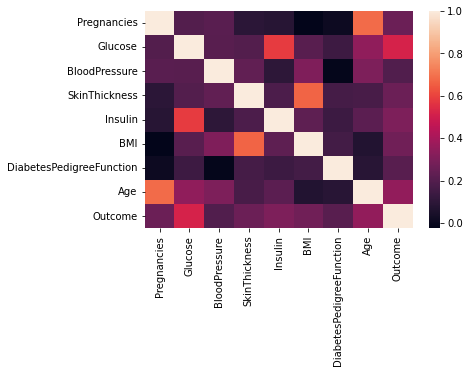

In [44]:
sns.heatmap(data.corr())

In [45]:
np.corrcoef(data["Outcome"],data["Pregnancies"])

array([[1.        , 0.25656596],
       [0.25656596, 1.        ]])

In [46]:
np.corrcoef(data["Outcome"],data["Glucose"])

array([[1.        , 0.51570273],
       [0.51570273, 1.        ]])

In [47]:
np.corrcoef(data["Outcome"],data["BloodPressure"])

array([[1.        , 0.19267327],
       [0.19267327, 1.        ]])

In [48]:
np.corrcoef(data["Outcome"],data["SkinThickness"])

array([[1.        , 0.25593566],
       [0.25593566, 1.        ]])

In [49]:
np.corrcoef(data["Outcome"],data["Insulin"])

array([[1.        , 0.30142922],
       [0.30142922, 1.        ]])

In [50]:
np.corrcoef(data["Outcome"],data["BMI"])

array([[1.        , 0.27011841],
       [0.27011841, 1.        ]])

In [51]:
np.corrcoef(data["Outcome"],data["DiabetesPedigreeFunction"])

array([[1.        , 0.20932951],
       [0.20932951, 1.        ]])

In [52]:
np.corrcoef(data["Outcome"],data["Age"])

array([[1.       , 0.3508038],
       [0.3508038, 1.       ]])

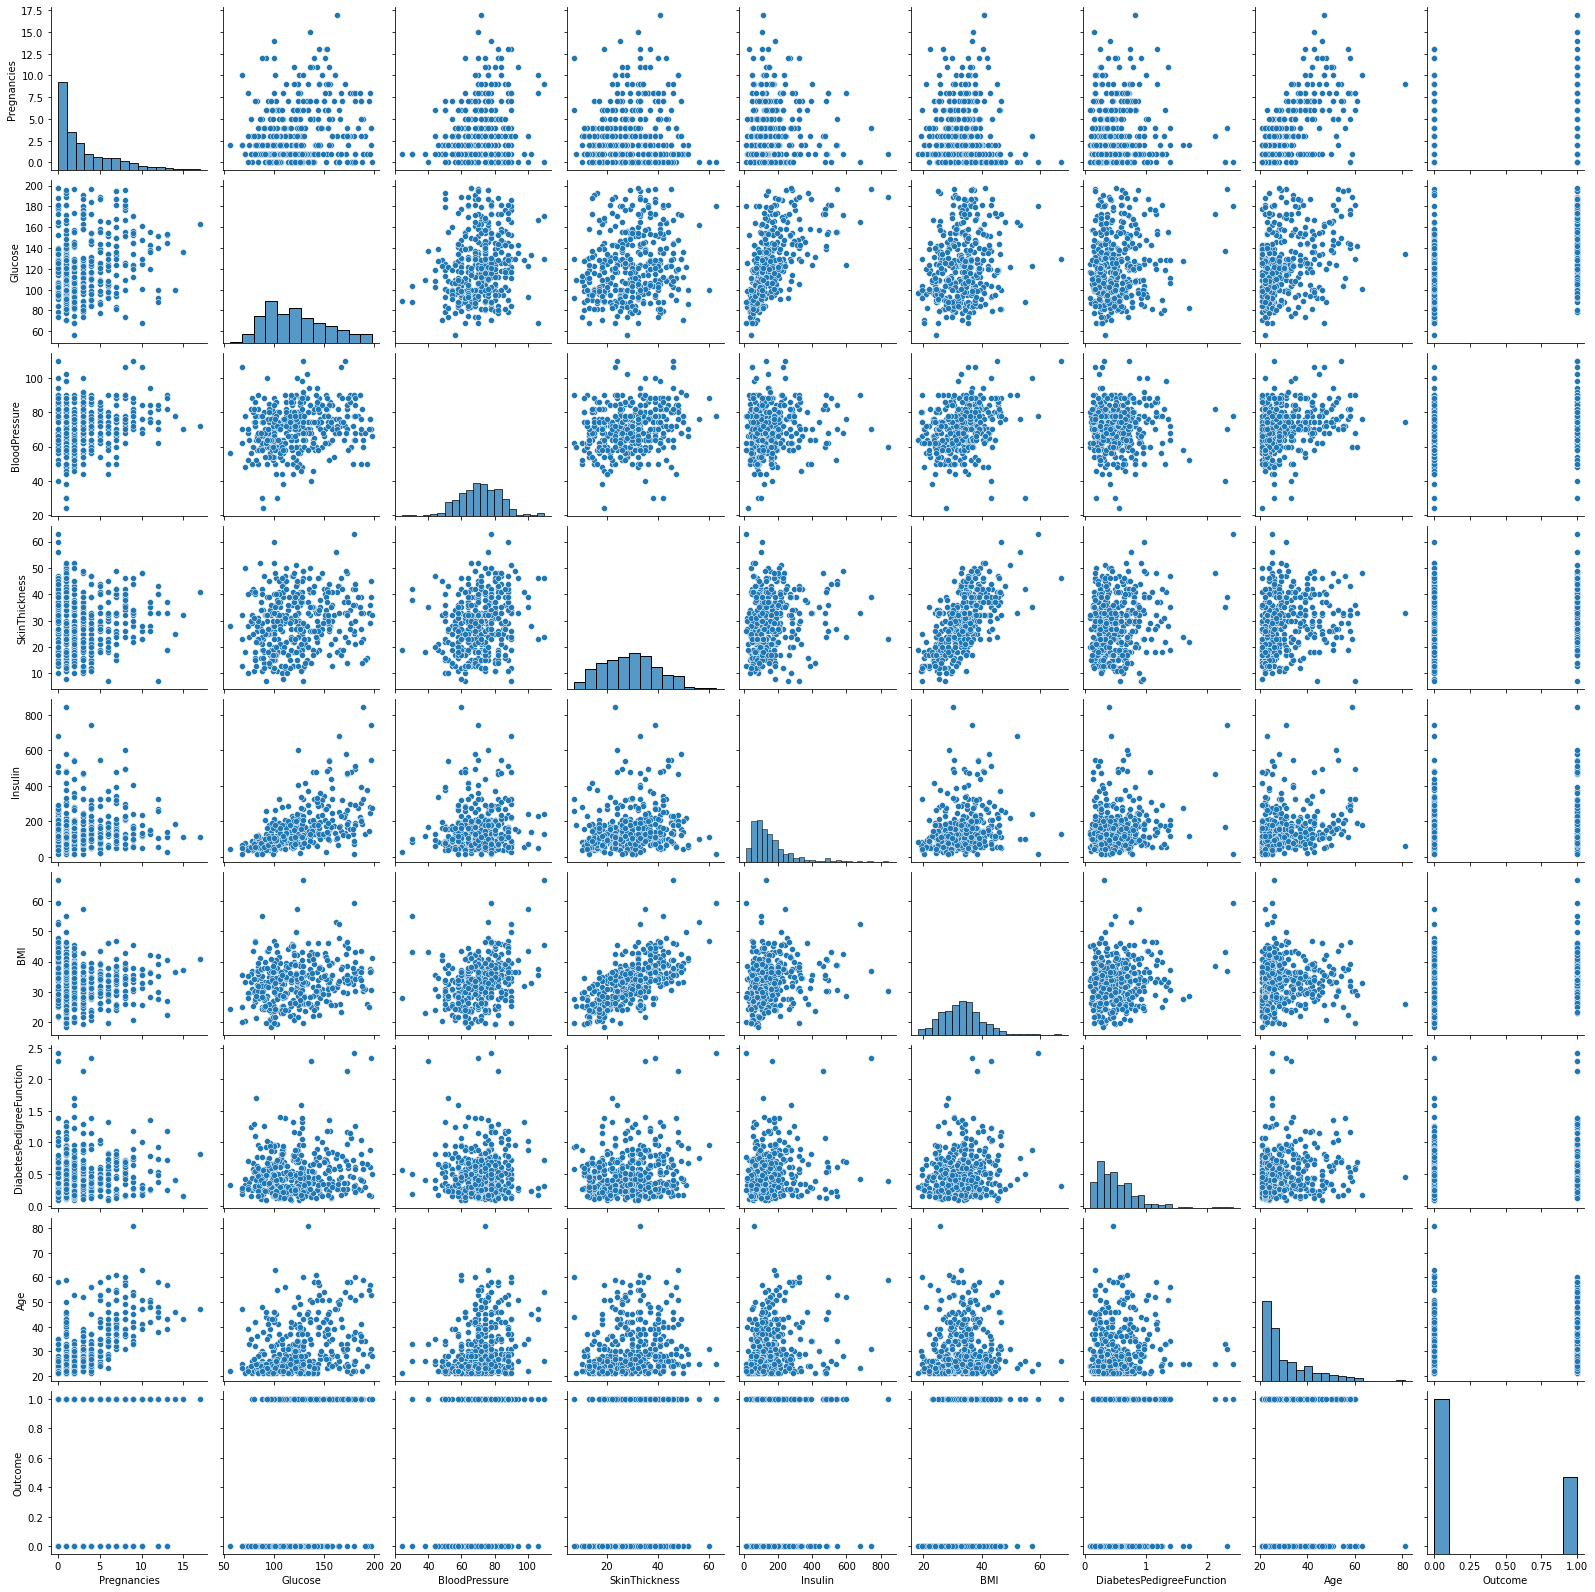

In [53]:
sns.pairplot(data) 

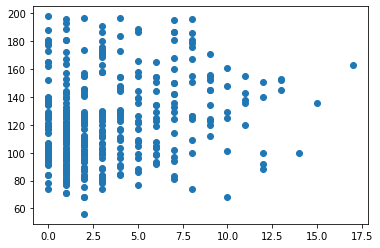

In [54]:
plt.scatter(data['Pregnancies'], data['Glucose']) #Delete this one

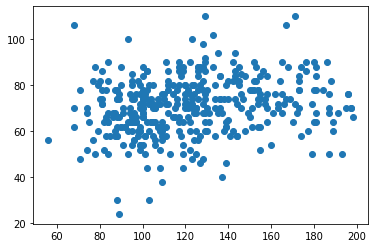

In [55]:
plt.scatter(data['Glucose'], data['BloodPressure'])

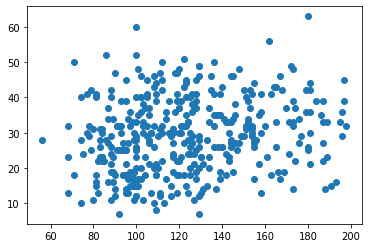

In [56]:
plt.scatter(data['Glucose'], data['SkinThickness'])

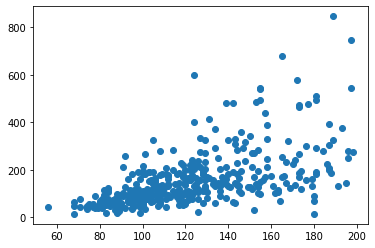

In [57]:
plt.scatter(data['Glucose'], data['Insulin'])

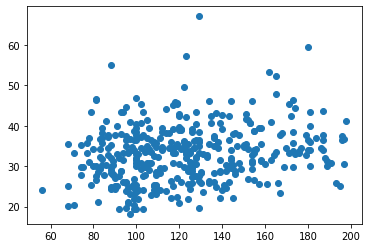

In [58]:
plt.scatter(data['Glucose'], data['BMI'])

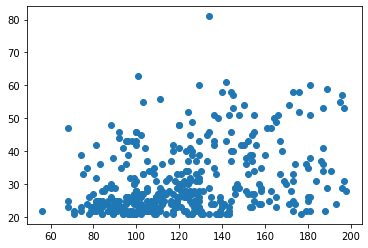

In [59]:
plt.scatter(data['Glucose'], data['Age'])

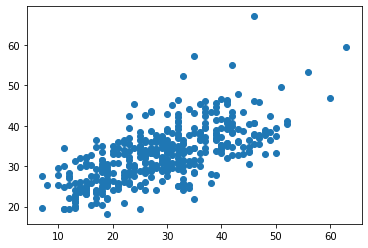

In [60]:
plt.scatter(data['SkinThickness'], data['BMI'])

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [62]:
features= ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI", "DiabetesPedigreeFunction", "Age"]
X= data[features]
y= data["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [63]:
#Logistic Regression with all features
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)
y_pred =LogReg.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
accuracy

/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7542372881355932

In [64]:
metrics.confusion_matrix(y_test, y_pred)

array([[70, 12],
       [17, 19]])

In [65]:
metrics.accuracy_score(y_test, y_pred)

0.7542372881355932

In [66]:
np.round(roc_auc_score(y_test, y_pred), 3)
#print("Auc for our sample data is {}".format(auc))

0.691

In [67]:
#Random Forest all features
classifer = RandomForestClassifier()
classifer.fit(X_train, y_train)
y_predict =classifer.predict(X_test)
accuracy=accuracy_score(y_predict,y_test)
accuracy

0.7372881355932204

In [68]:
metrics.confusion_matrix(y_test, y_predict) #Random Forest All variables

array([[66, 16],
       [15, 21]])

In [69]:
metrics.accuracy_score(y_test, y_predict)

0.7372881355932204

In [70]:
auc = np.round(roc_auc_score(y_test, y_predict), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.694


In [71]:
#KNN with all features
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_predictKNN = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predictKNN)
print("Accuracy:", accuracy)

Accuracy: 0.788135593220339


In [72]:
metrics.confusion_matrix(y_test, y_predictKNN)

array([[70, 12],
       [13, 23]])

In [73]:
metrics.accuracy_score(y_test, y_predictKNN)

0.788135593220339

In [74]:
np.round(roc_auc_score(y_test, y_predictKNN), 3)

0.746

In [75]:
cor=data.corr()
cor_target=abs(cor["Outcome"])
relevant=cor_target[cor_target>0.3]
list=relevant.keys().to_list()
list[:-1]

['Glucose', 'Insulin', 'Age']

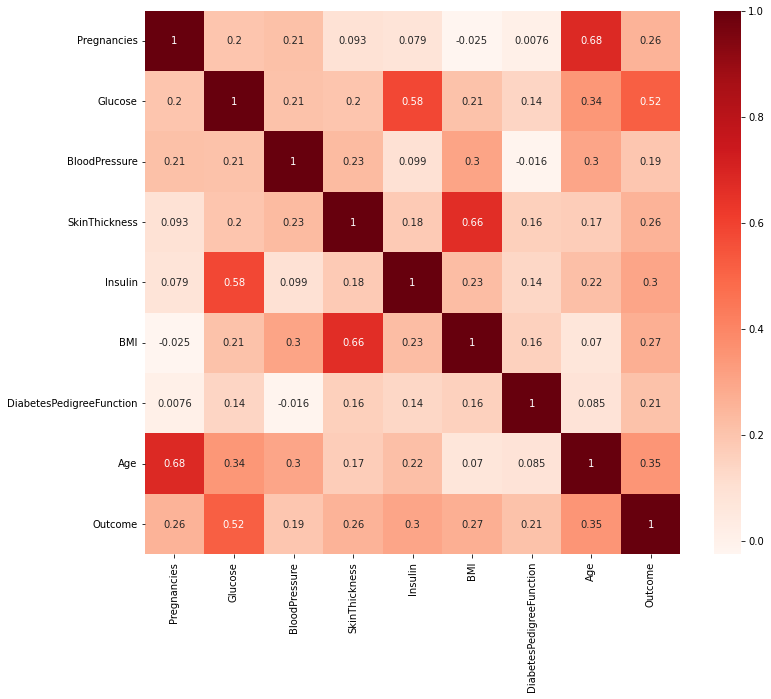

In [76]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [77]:
#Building model with corr variables
features_corr= ["Glucose", "Insulin","Age"]
X_corr= data[features_corr]
y_corr= data["Outcome"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_corr,y_corr,test_size=0.3,random_state=1)

In [78]:
classifer2 = RandomForestClassifier()
classifer2.fit(X_train2, y_train2)
y_predict2 =classifer2.predict(X_test2)
accuracy2=accuracy_score(y_test2,y_predict2)
accuracy2

0.7542372881355932

In [79]:
metrics.confusion_matrix(y_test2, y_predict2)

array([[66, 16],
       [13, 23]])

In [80]:
np.round(roc_auc_score(y_test2, y_predict2), 3)

0.722

In [81]:
LogReg2 = LogisticRegression()
LogReg2.fit(X_train2,y_train2)
y_pred2 =LogReg2.predict(X_test2)
accuracy2=accuracy_score(y_test2,y_pred2)
accuracy2

0.7457627118644068

In [82]:
np.round(roc_auc_score(y_test2, y_pred2), 3)

0.7

In [83]:
metrics.confusion_matrix(y_test2, y_pred2)

array([[67, 15],
       [15, 21]])

In [131]:
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X_train2, y_train2)
y_predictKNN2 = knn2.predict(X_test2)
accuracy2 = accuracy_score(y_test2, y_predictKNN2)
accuracy2

0.7542372881355932

In [85]:
metrics.confusion_matrix(y_test2, y_predictKNN2)

array([[66, 16],
       [13, 23]])

In [86]:
np.round(roc_auc_score(y_test2, y_predictKNN2), 3)

0.722

In [87]:
import statsmodels.api as sm
log_reg2 = sm.Logit(y_train2, X_train2)
log_reg2 = log_reg2.fit()
y_hat2=log_reg2.predict(X_test2)
log_reg2.predict(X_train2)
(log_reg2.predict(X_train2)>=0.5).astype(int)
log_reg2.pred_table()

Optimization terminated successfully.
         Current function value: 0.661418
         Iterations 4


array([[164.,  16.],
       [ 81.,  13.]])

In [88]:
print((164+13)/(81+16+13+164))

0.6459854014598541


In [132]:
#Log Regression with pvalues to determine best features. pvalue < 0.05 more relevant feature
#Using all features
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.571437
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.111     
Dependent Variable:    Outcome            AIC:                329.1476  
Date:                  2023-11-03 21:07   BIC:                358.0526  
No. Observations:      274                Log-Likelihood:     -156.57   
Df Model:              7                  LL-Null:            -176.20   
Df Residuals:          266                LLR p-value:        1.7568e-06
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1323   0.0621  2.1298 0

In [133]:
result.pvalues
pvaluesFS = pd.DataFrame(data={
    #'Attribute': X_train.columns,
    'Pvalues': result.pvalues
})
#importances = importances.sort_values(by='Importance') #ascending=False)
pvaluesFS


,Pvalues
Pregnancies,0.033185
Glucose,0.012641
BloodPressure,0.000004
SkinThickness,0.097987
Insulin,0.215877
BMI,0.437963
DiabetesPedigreeFunction,0.909290
Age,0.759816


In [134]:
pvaluesFS<0.05

,Pvalues
Pregnancies,True
Glucose,True
BloodPressure,True
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False


In [92]:
#Best features based on pvalues
features_pvalues= ["Pregnancies","Glucose", "BloodPressure"]
X_pvalues= data[features_pvalues]
y_pvalues= data["Outcome"]
X_train3,X_test3,y_train3,y_test3 = train_test_split(X_pvalues,y_pvalues,test_size=0.3,random_state=1)

In [136]:
LogReg3 = LogisticRegression()
LogReg3.fit(X_train3,y_train3)
y_pred3 =LogReg3.predict(X_test3)
accuracy3=accuracy_score(y_test3,y_pred3)
accuracy3

0.711864406779661

In [139]:
metrics.confusion_matrix(y_test3, y_pred3)

array([[66, 16],
       [18, 18]])

In [140]:
np.round(roc_auc_score(y_test3, y_pred3), 3)

0.652

In [135]:
classifer3 = RandomForestClassifier()
classifer3.fit(X_train3, y_train3)
y_predict3 =classifer3.predict(X_test3)
accuracy3=accuracy_score(y_test3,y_predict3)
accuracy3

0.7033898305084746

In [141]:
metrics.confusion_matrix(y_test3, y_predict3)

array([[67, 15],
       [20, 16]])

In [142]:
np.round(roc_auc_score(y_test3, y_predict3), 3)

0.631

In [138]:
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train3, y_train3)
y_predictKNN3 = knn3.predict(X_test3)
accuracy3 = accuracy_score(y_test3, y_predictKNN3)
accuracy3

0.6779661016949152

In [143]:
metrics.confusion_matrix(y_test3, y_predictKNN3)

array([[62, 20],
       [18, 18]])

In [144]:
np.round(roc_auc_score(y_test3, y_predictKNN3), 3)

0.628

In [145]:
log_reg3 = sm.Logit(y_train3, X_train3)
log_reg3 = log_reg3.fit()
y_hat3=log_reg3.predict(X_test3)
log_reg3.predict(X_train3)

Optimization terminated successfully.
         Current function value: 0.580921
         Iterations 5


332    0.546720
391    0.396324
388    0.158262
29     0.225279
273    0.250629
         ...   
203    0.395424
255    0.567898
72     0.544058
235    0.583414
37     0.813958
Length: 274, dtype: float64

In [146]:
(log_reg3.predict(X_train3)>=0.5).astype(int)
log_reg3.pred_table()

array([[152.,  28.],
       [ 50.,  44.]])

In [147]:
print((152+44)/(152+28+50+44))

0.7153284671532847


In [97]:
metrics.accuracy_score(y_test, y_pred) #test 

0.7542372881355932

In [98]:
metrics.confusion_matrix(y_test, y_pred) #test

array([[70, 12],
       [17, 19]])

In [99]:
print((70+19)/(70+12+17+19))

0.7542372881355932


In [100]:
print(classification_report(y_test, y_pred)) #Logistic Regression all features

              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.61      0.53      0.57        36

    accuracy                           0.75       118
   macro avg       0.71      0.69      0.70       118
weighted avg       0.75      0.75      0.75       118



In [101]:
#Logistic Regression with p-value features
LogReg3 = LogisticRegression()
LogReg3.fit(X_train3,y_train3)
y_pred3 =LogReg3.predict(X_test3)
accuracy=accuracy_score(y_pred3,y_test3)
accuracy

0.711864406779661

In [102]:
print(classification_report(y_test, y_predict)) #Random Forest all features

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        82
           1       0.57      0.58      0.58        36

    accuracy                           0.74       118
   macro avg       0.69      0.69      0.69       118
weighted avg       0.74      0.74      0.74       118



In [103]:
print(classification_report(y_test, y_predict2)) #Ran For corr features

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.59      0.64      0.61        36

    accuracy                           0.75       118
   macro avg       0.71      0.72      0.72       118
weighted avg       0.76      0.75      0.76       118



In [104]:
print(classification_report(y_test, y_predict3)) #Ran For pvalue features

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        82
           1       0.50      0.42      0.45        36

    accuracy                           0.69       118
   macro avg       0.63      0.62      0.62       118
weighted avg       0.68      0.69      0.69       118



In [105]:
from sklearn.preprocessing import StandardScaler
# Split the data into features (X) and target (y)
#Use the same X and y as above

# Split the data into training and test sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train4, y_train4)

KNeighborsClassifier(n_neighbors=3)

In [107]:
y_predict4 = knn.predict(X_test4)

In [108]:
accuracy = accuracy_score(y_test4, y_predict4)
print("Accuracy:", accuracy)

Accuracy: 0.7848101265822784


In [123]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,31)]
scores = []

#scaler = StandardScaler()
#X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train2, y_train2, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

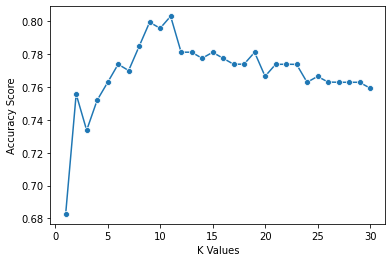

In [124]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [128]:
#Training model with best k
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train2, y_train2)

KNeighborsClassifier(n_neighbors=11)

In [112]:
from sklearn.metrics import recall_score
y_pred4 = knn.predict(X_test4)

accuracy = accuracy_score(y_test4, y_pred4)
precision = precision_score(y_test4, y_pred4)
recall = recall_score(y_test4, y_pred4)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6582278481012658
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
best_k

11

In [130]:
print((k_values),(scores))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] [0.6827609427609428, 0.7556902356902357, 0.7336700336700337, 0.751986531986532, 0.7628282828282827, 0.7738720538720539, 0.7700336700336701, 0.7847811447811448, 0.7994612794612793, 0.7957575757575758, 0.8030976430976431, 0.7812121212121212, 0.7812121212121212, 0.7775084175084175, 0.7811447811447811, 0.7775084175084175, 0.7738720538720538, 0.7739393939393939, 0.7811447811447811, 0.7665319865319865, 0.7738047138047138, 0.7738720538720538, 0.7738047138047138, 0.7628956228956228, 0.7664646464646464, 0.7630303030303031, 0.7628956228956228, 0.7628956228956228, 0.7628956228956228, 0.7593265993265994]


In [115]:
# initialize data of lists. 
data5 = {'k_values': k_values, 
        'Scores': scores} 
  
# Create DataFrame 
df = pd.DataFrame(data5) 
  
# Print the output. 
df 

,k_values,Scores
0,1,0.682155
1,2,0.733670
2,3,0.719057
3,4,0.752054
4,5,0.740875
5,6,0.766667
6,7,0.781077
7,8,0.792054
8,9,0.810370
9,10,0.781077


In [116]:
best_index

8

In [117]:
scores[26]

0.7812121212121211

In [118]:
accuracy = accuracy_score(y_test4, y_predict4)
accuracy

0.7848101265822784

In [119]:
accuracy = accuracy_score(y_test4, y_pred4)
accuracy

0.6582278481012658

In [120]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [121]:
from sklearn .metrics import roc_auc_score
auc = np.round(roc_auc_score(y_test4, y_pred4), 3)
print("Auc for our sample data is {}".format(auc))

Auc for our sample data is 0.5


In [122]:
#AUC for Random Forest y_predict2
auc2 = np.round(roc_auc_score(y_test2, y_predict2), 3)
print("Auc for our sample data is {}".format(auc2))

Auc for our sample data is 0.722
